In [4]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
from tqdm import tqdm

In [5]:
a=0.5
def Ex(phi,x,y,z):
    integrand=(x - a*np.cos(phi)) / np.power(x**2 + y**2 + z**2 + a**2 - 2*a*x*np.cos(phi) - 2*a*y*np.sin(phi), 3/2)
    return integrand
def Ey(phi,x,y,z):
     integrand=(y - a*np.sin(phi)) / np.power(x**2 + y**2 + z**2 + a**2 - 2*a*x*np.cos(phi) - 2*a*y*np.sin(phi), 3/2)
     return integrand
def Ez(phi,x,y,z):
     integrand=(z) / np.power(x**2 + y**2 + z**2 + a**2 - 2*a*x*np.cos(phi) - 2*a*y*np.sin(phi), 3/2)
     return integrand

def integral_x(x,y,z):
    return (1/(2*np.pi)) * spi.quad(Ex, 0, 2*np.pi, args=(x, y, z))[0]
def integral_y(x,y,z):
    return (1/(2*np.pi)) * spi.quad(Ey, 0, 2*np.pi, args=(x, y, z))[0]
def integral_z(x,y,z):
    return (1/(2*np.pi)) * spi.quad(Ez, 0, 2*np.pi, args=(x, y, z))[0]


print(integral_x(0.6,0.6,1),integral_y(0.6,0.6,1),integral_z(0.6,0.6,1))


0.21152494075605968 0.21152494075605963 0.4386473214517897


[[-0.44648528 -0.75793373 -1.24425325 -1.24425325 -0.75793373 -0.44648528]
 [-0.32282667 -0.60972909 -1.435712   -1.435712   -0.60972909 -0.32282667]
 [-0.11532621 -0.21988633 -0.68683572 -0.68683572 -0.21988633 -0.11532621]
 [ 0.11532621  0.21988633  0.68683572  0.68683572  0.21988633  0.11532621]
 [ 0.32282667  0.60972909  1.435712    1.435712    0.60972909  0.32282667]
 [ 0.44648528  0.75793373  1.24425325  1.24425325  0.75793373  0.44648528]] 
 [[0.44648528 0.75793373 1.24425325 1.24425325 0.75793373 0.44648528]
 [0.53804445 1.01621514 2.39285333 2.39285333 1.01621514 0.53804445]
 [0.57663105 1.09943165 3.43417862 3.43417862 1.09943165 0.57663105]
 [0.57663105 1.09943165 3.43417862 3.43417862 1.09943165 0.57663105]
 [0.53804445 1.01621514 2.39285333 2.39285333 1.01621514 0.53804445]
 [0.44648528 0.75793373 1.24425325 1.24425325 0.75793373 0.44648528]]


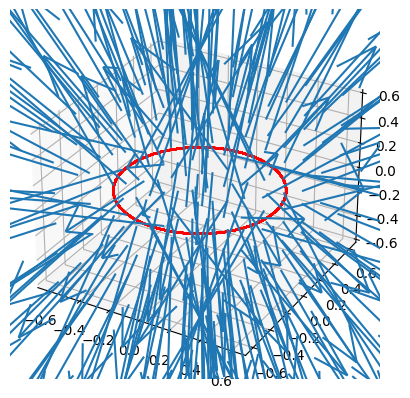

In [6]:
import numpy as np
from scipy import special

# Definir constantes

a = 0.5



N = 6
x = np.linspace(-0.6, 0.6, N)
y = np.linspace(-0.6, 0.6, N)
z = np.linspace(-0.6, 0.6, N)
X, Y, Z = np.meshgrid(x, y, z)


EX = np.zeros((N,N,N))
EY = np.zeros((N,N,N))
EZ = np.zeros((N,N,N))

for i in range(N):
    for j in range(N):
        for k in range(N):
             EX[i,j,k] += (1/(2*np.pi)) * spi.quad(Ex, 0, 2*np.pi, args=(X[i,j,k], Y[i,j,k], Z[i,j,k]))[0]
             EY[i,j,k] += (1/(2*np.pi)) * spi.quad(Ey, 0, 2*np.pi, args=(X[i,j,k], Y[i,j,k], Z[i,j,k]))[0]
             EZ[i,j,k] += (1/(2*np.pi)) * spi.quad(Ez, 0, 2*np.pi, args=(X[i,j,k], Y[i,j,k], Z[i,j,k]))[0]

            
            
print(EX[len(EX)-1],"\n",EY[len(EX)-1])




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, EX, EY, EZ)




# plot the red circle at the origin
u, v = np.mgrid[0:2*np.pi:50j, 0:2*np.pi:50j]
x = 0.5*np.cos(u)
y = 0.5*np.sin(u)
z = np.zeros_like(u)
ax.plot_wireframe(x, y, z, color='r')

plt.show()






            


100%|██████████| 10000/10000 [00:00<00:00, 17158.04it/s]


0.666800013334666

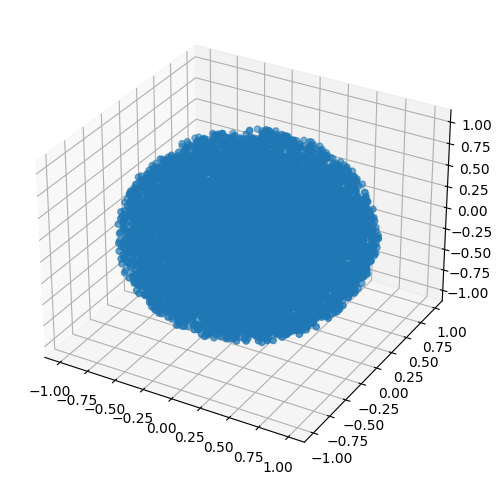

In [7]:
# Montecarlo

def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in tqdm(range(N)):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points

Sphere = CreateSphere(10000)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Sphere[:,0],Sphere[:,1],Sphere[:,2])

N=10000
I_ij=2/5
x=np.linspace(-1,1,N)
y=np.linspace(-1,1,N)
z=np.linspace(-1,1,N)
i=(x,y,z)
j=(x,y,z)
suma=0
for i in range(N):
  suma+=y[i]**2+z[i]**2

I_xx=(1/N)*suma
I_xx